# The $k$-Nearest Neighbors Algorithm

## $k$-Nearest Neighbors
The $k$-nearest neighbors algorithm, or **KNN** for short, is a nonparametric algorithm that assumes that similar data exist in close proximity. In other words, similar things are near to each other. 


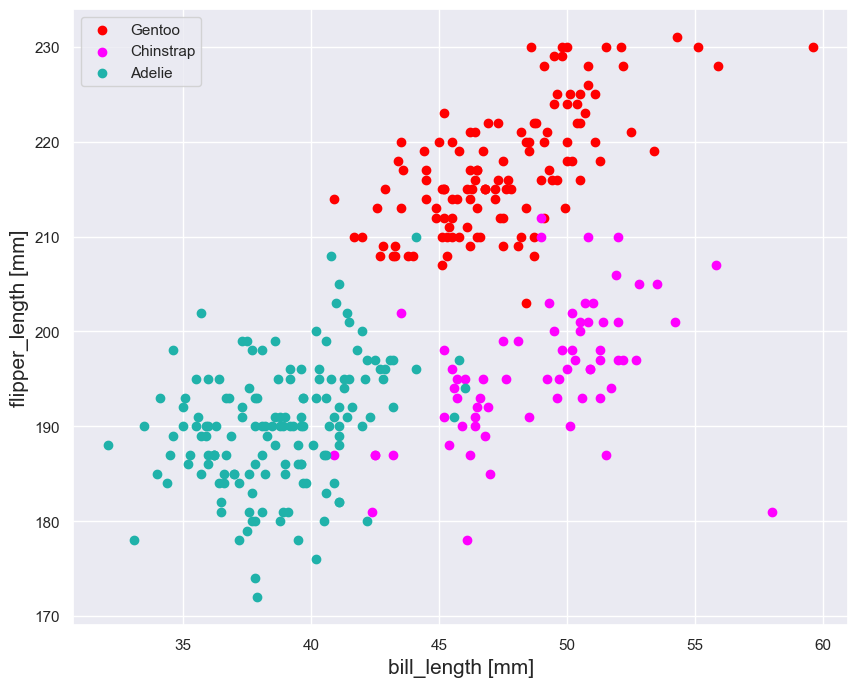

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
iris = pd.read_csv("Datasets/palmer_penguins.csv")

## Plot the data
species = ["Gentoo", "Chinstrap", "Adelie"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for specie, color in zip(species, colors):
    temp_df = iris[iris.species == specie]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.flipper_length_mm,
               c = color,
               label = specie, 
               )
    
ax.set_xlabel("bill_length [mm]", fontsize = 15)
ax.set_ylabel("flipper_length [mm]", fontsize = 15)
ax.legend()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

X = iris[["bill_length_mm",
          "flipper_length_mm"]].to_numpy()

y = iris["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=1)

In [46]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 3.8587562763149514


In [47]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [48]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([ 50.2, 202. ]), 'Chinstrap', 1.0440306508910542],
 [array([ 48.1, 199. ]), 'Chinstrap', 3.124099870362661],
 [array([ 54.2, 201. ]), 'Chinstrap', 3.700000000000003],
 [array([ 48.7, 208. ]), 'Gentoo', 7.22772439983706],
 [array([ 46., 195.]), 'Chinstrap', 7.5]]

In [49]:
# Show the true label 
y_test[-1]

'Chinstrap'

In [50]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [51]:
# Test our function 
KNN_Predict(X_test[20], X_train, y_train, 5)

'Gentoo'

In [52]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

In [53]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.05263157894736842

In [66]:
possible_k = [k for k in range(3, 30, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

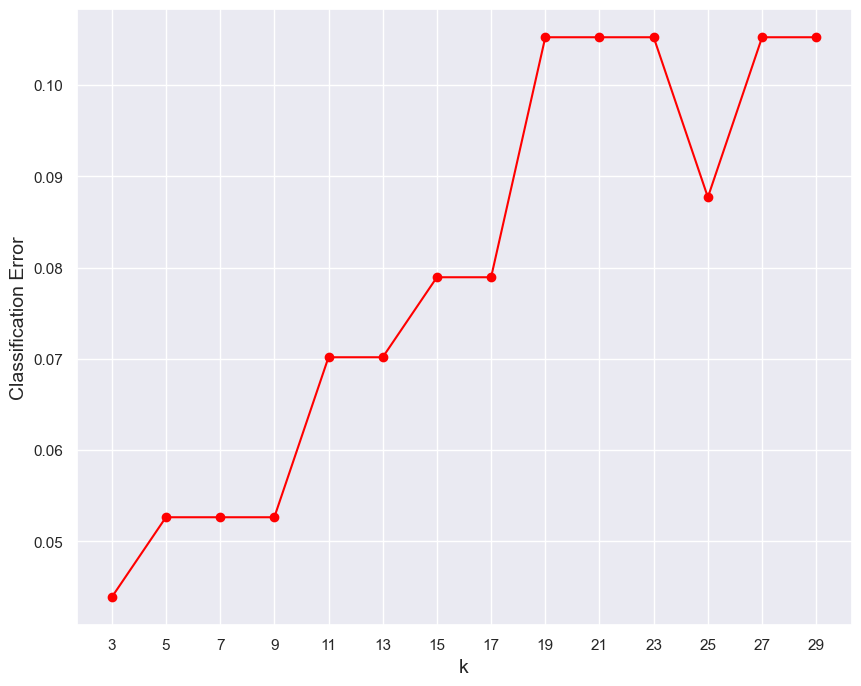

In [67]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

## Recommender Systems with $k$-Nearest Neighbors

In [87]:
car = pd.read_csv("Datasets/EV_cars.csv")
car

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3


In [88]:
# Set the index attribute for our DataFrame 
car.set_index("Car_name", drop = False, inplace = True)
car

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
Car_name,,,,,,,,,
Tesla Model Y Long Range Dual Motor,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
Tesla Model 3,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
BYD ATTO 3,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
MG MG4 Electric 64 kWh,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
Tesla Model 3 Long Range Dual Motor,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4
...,...,...,...,...,...,...,...,...,...
Citroen e-Jumpy Combi XL 50 kWh,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1
Fiat E-Ulysse L2 50 kWh,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1
Opel Vivaro-e Combi L 50 kWh,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1


In [90]:
# Find the vector of data associated with "The Terminator"
car.loc["Tesla Model 3"]

Battery                                                           57.5
Car_name                                                 Tesla Model 3
Car_name_link           https://ev-database.org/car/1991/Tesla-Model-3
Efficiency                                                         137
Fast_charge                                                      700.0
Price.DE.                                                      46220.0
Range                                                              420
Top_speed                                                          201
acceleration..0.100.                                               6.1
Name: Tesla Model 3, dtype: object

In [92]:
# View the columns of our DataFrame
car.columns

Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [93]:
def car_recommendations(Car_name, df, k):
    categories = ['Battery', 
                    'Efficiency', 
                    'Fast_charge', 
                    'Price.DE.',
                    'Range', 
                  'Top_speed', 
                  'acceleration..0.100.']

    X = df[categories].to_numpy()
    y = df["Car_name"].to_numpy()

    point = df[categories].loc[Car_name].to_numpy()
    neighbors = k_nearest_neighbors(point, X, y, k+1)
    return [x[1] for x in neighbors[1:]]

recommendations = car_recommendations("Tesla Model 3", car, 5)

print("Car Recommendations")
for i, ca in enumerate(recommendations):
    print(f"{i+1}. {ca}")

Car Recommendations
1. Renault Megane E-Tech EV60 220hp
2. Kia Niro EV
3. Hyundai Kona Electric 65 kWh
4. Toyota bZ4X FWD
5. Tesla Model Y
